# 2. Text and categorical data problems
**Categorical and text data can often be some of the messiest parts of a dataset due to their unstructured nature. In this chapter, you’ll learn how to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.**

## Membership constraints
### Categories and membership constraints
**Predifined finite set of categories**

Type of data | Example values | Numeric representation
:---|:---|:---
Marriage Status | `unmarried`, `married` | `0`, `1`
Household Income Category | `0-20k`, `20-40k`, ... | `0`, `1`, ...
Loan Status | `default`, `payed`, `no_loan` | `0`, `1`, `2`

*Marriage status can **only** be `unmarried` _or_ `married`*

To run machine learning models on categorical data, they are often coded as numbers. Since categorical data represent a predefined set of categories, they can't have values that go beyond these predefined categories.

### Why could we have these problems?
We can have inconsistencies in our categorical data for a variety of reasons. This could be due to data entry issues with free text vs dropdown fields, *data parsing errors* and *other types of errors*.

### How do we treat these problems?
There's a variety of ways we can treat these, with increasingly specific solutions for different types of inconsistencies. Most simply, we can drop the rows with incorrect categories. We can attempt remapping incorrect categories to correct ones, and more. 

### An example
Here's a DataFrame named `study_data` containing a list of first names, birth dates, and blood types. Additionally, a DataFrame named categories, containing the correct possible categories for the blood type column has been created as well.

```python
# Read study data and print it
study_data = pd.read_csv('study.csv')
study_data
```
```
       name    birthday    blood_type
1      Beth  2019-10-20            B-
2  Ignatius  2020-07-08            A-
3      Paul  2019-08-12            O+
4     Helen  2019-03-17            O-
5  Jennifer  2019-12-17            Z+   <--
6   Kennedy  2020-04-27            A+
7     Keith  2018-04-19           AB+
```

There's definitely no blood type named `Z+`. 

Luckily, the `categories` DataFrame will help us systematically spot all rows with these inconsistencies. 

```python
# Correct possible blood types
categories
```
```
  blood_type
1         O-
2         O+
3         A-
4         A+
5         B+
6         B-
7        AB+
8        AB-
```

It's always good practice to keep a log of all possible values of your categorical data, as it will make dealing with these types of inconsistencies way easier.

### A note on joins
- Anti Joins: What is **in A and not in B**
- Inner Joins: What is **in *both* A and B**

### Finding inconsistent categories

We first get all inconsistent categories in the `blood_type` column of the `study_data` DataFrame. We do that by creating a set out of the `blood_type` column which stores its unique values, and use the `difference` method which takes in as argument the `blood_type` column from the `categories` DataFrame. 

```python
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
print(inconsistent_categories)
```
This returns all the categories in `blood_type` that are not in categories. 
```
{'Z+'}
```

We then find the inconsistent rows by finding all the rows of the `blood_type` columns that are equal to inconsistent categories by using the `isin` method, this returns a series of boolean values that are `True` for inconsistent rows and `False` for consistent ones. We then subset the `study_data` DataFrame based on these boolean values, 

```python
# Get and print rows with incinsistent categories
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
study_data[inconsistent_rows]
```
and we have our inconsistent data.
```
       name    birthday    blood_type
5  Jennifer  2019-12-17            Z+
```

### Dropping inconsistent categories
To drop inconsistent rows and keep ones that are only consistent. We just use the tilde(`~`) symbol while subsetting which returns everything except inconsistent rows.

```python
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
inconsistent_data = study_data[inconsistent_rows]
# Drop inconsistent categories and get consistent data only
consistent_data = study_data[~inconsistent_rows]
```


## Finding consistency
In this exercise and throughout this chapter, you'll be working with the `airlines` DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named `categories` was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. 

In [1]:
import pandas as pd
airlines = pd.read_csv('airlines.csv', index_col=0)
airlines.head(3)

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70,Average,Somewhat safe,Neutral


- Print the `categories` DataFrame and take a close look at all possible correct categories of the survey columns.

In [11]:
# Print categories DataFrame
categories = pd.read_csv('categories.csv')
print(categories)

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied


- Print the unique values of the survey columns in `airlines` using the `.unique()` method.

In [12]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Unacceptable' 'Somewhat clean' 'Somewhat dirty'
 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



- Create a set out of the `cleanliness` column in `airlines` using `set()` and find the inconsistent category by finding the **difference** in the `cleanliness` column of `categories`.
- Find rows of `airlines` with a `cleanliness` value not in `categories` and print the output.

In [18]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# View rows with inconsistent category
display(airlines[cat_clean_rows])

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559,Unacceptable,Very safe,Somewhat satsified
18,2913,Friday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,225,Unacceptable,Very safe,Somewhat satsified
100,2321,Wednesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,130,Unacceptable,Somewhat safe,Somewhat satsified


- Print the rows with the consistent categories of `cleanliness` only.

In [19]:
# View rows with consistent categories only
display(airlines[~cat_clean_rows])

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190,Clean,Very safe,Somewhat satsified
5,634,Thursday,ALASKA,NEWARK,East US,Hub,Gates 50-59,2018-12-31,140,Somewhat clean,Very safe,Very satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...
2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280,Somewhat clean,Neutral,Somewhat satsified
2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165,Clean,Very safe,Very satisfied
2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92,Clean,Very safe,Very satisfied
2807,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95,Clean,Somewhat safe,Very satisfied


---

## Categorical variables
### What type of errors could we have?
1. **Value Inconsistency**
    - *Inconsistent fields*: `'married'`, `'Maried'`, `'UNMARRIED'`, `'not married'`...
    - _Trailling white spaces: _`'married '`, `' married '` ...


2. **Collapsing too many categories to few**
    - *Creating new groups*: `0-20k`, `20-40k` categories ... from continuous household income data
    - *Mapping groups to new ones*: Mapping household income categories to 2 `'rich'`, `'poor'`


3. **Making sure data is of type `category`**

### Value consistency
A common categorical data problem is having values that slightly differ because of capitalization. Not treating this could lead to misleading results when we decide to analyze our data, for example, let's assume we're working with a demographics dataset, and we have a marriage status column with inconsistent capitalization. 

***Capitalization***: `'married'`, `'Married'`, `'UNMARRIED'`, `'unmarried'` ...

Here's what counting the number of married people in the `marriage_status` Series would look like. Note that the `.value_counts()` methods works on Series only.

```python
# Get marriage status column
marriage_status = demographics['marriage_status']
marriage_status.value_counts()
```
```
unmarried    352
married      268
MARRIED      204
UNMARRIED    176
dtype: int64
```


For a DataFrame, we can `groupby` the column and use the `.count()` method.
```python
# Get value counts on DataFrame
marriage_status.groupby('marriage_status').count()
```
```
                 household_income  gender
marriage_status  
MARRIED                       204     204
UNMARRIED                     176     176
married                       268     268
unmarried                     352     352
```

To deal with this, we can either capitalize or lowercase the marriage_status column. This can be done with the `str.upper()` or `str.lower()` functions respectively.

```python
# Caplitalize
marriage_status['marriage_status'] = marriage_status['marriage_status'].str.upper()
marriage_status['marriage_status'].value.count()
```
```
UNMARRIED    528
MARRIED      472
```

```python
# Lowercase
marriage_status['marriage_status'] = marriage_status['marriage_status'].str.lower()
marriage_status['marriage_status'].value.count()
```
```
unmarried    528
married      472
```

Another common problem with categorical values are leading or trailing spaces. 

***Trailling spaces***: `'married '`, `'married'`, `'unmarried'`, `' unmarried'` ...

For example, imagine the same demographics DataFrame containing values with leading spaces. Here's what the counts of married vs unmarried people would look like.

```python
# Get marriage status column
marriage_status = demographics['marriage_status']
marriage_status.value_counts()
```
```
 unmarried   352
unmarried    268
married      204
married      176
dtype: int64
```

Note that there is a married category with a trailing space on the right, which makes it hard to spot on the output, as opposed to unmarried.

To remove leading spaces, we can use the `str.strip()` method which when given no input, strips all leading and trailing white spaces.
```python
# Strip all spaces
marriage_status = demographics['marriage_status'].str.strip()
demographics['marriage_status'].value_counts()
```
```
unmarried    528
married      472
```

### Collapsing data into categories
***Create categories out of data***: `income_group` column from `income` column

To create categories out of data, let's use the example of creating an income group column in the demographics DataFrame. We can do this in 2 ways. 

The first method utilizes the `qcut` function from `pandas`, which automatically divides our data based on its distribution into the number of categories we set in the `q` argument, we created the category names in the group_names list and fed it to the labels argument, returning the following. 

```python
# Using qcut()
import padnas as pd
group_names = ['0-200k', '200-500k', '500k+']
demographics['income_group'] = pd.qcut(demographics['household_income'], q = 3, 
                                       labels = group_names)
# Print income_group column
demographics[['income_group', 'household_income']]
```
```
     category  household_income
0   200k-500k  189243
1       500K+  778533
...
```
Notice that the first row actually misrepresents the actual income of the income group, as we didn't instruct qcut where our ranges actually lie.

We can do this with the `cut` function instead, which lets us define category cutoff ranges with the `bins` argument. It takes in a list of cutoff points for each category, with the final one being infinity represented with `np.inf()`. From the output, we can see this is much more correct.

```python
# Using cut() - create category ranges and names
ranges = [0, 200000, 500000, np.inf]
group_names = ['0-200k', '200-500k', '500k+']
# Create income group column
demographics['income_group'] = pd.cut(demographics['household_income'], bins=ranges, 
                                       labels = group_names)
# Print income_group column
demographics[['income_group', 'household_income']]
```
```
     category  Income
0   200k-500k  189243
1       500K+  778533
```

### Collapsing data into categories
Sometimes, we may want to reduce the amount of categories we have in our data. Let's move on to mapping categories to fewer ones. For example, assume we have a column containing the operating system of different devices, and contains these unique values. Say we want to collapse these categories into 2, `DesktopOS`, and `MobileOS`. We can do this using the replace method. It takes in a dictionary that maps each existing category to the category name you desire. 

***Map categories to fewer ones***: reducing categories in categorical column

`operating_system` column is: `'Microsoft'`, `'MacOS'`, `'IOS'`, `'Android'`, `'Linux'`

`operating_system` column should become: `'DesktopOS'`, `'MobileOS'`

```python
# Create mapping dictionary and replace
mapping = {'Microsoft':'DesktopOS', 'MacOS':'DesktopOS' , 'Linux':'DesktopOS' , 'IOS':'MobileOS' , 'Android':'MobileOS'}
device['operating_system'] = devices['operating_system'].replace(mapping)
device['operating_system'].unique()
```
```
array(['DesktopOS', 'MobileOS'], dtype=object)
```

In this case, this is the mapping dictionary. A quick print of the unique values of operating system shows the mapping has been complete.

## Inconsistent categories
In this exercise, you'll be revisiting the `airlines` DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis.

- Print the unique values in `dest_region` and `dest_size` respectively.

In [23]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' 'Medium' 'Large' '    Hub' 'Hub        ' '        Small'
 'Medium       ' '       Medium' '      Large' 'Small      ' 'Large      ']


### Question
From looking at the output, what do you think is the problem with these columns?

1. ~~The `dest_region` column has only inconsistent values due to capitalization.~~

2. The `dest_region` column has inconsistent values due to capitalization and has one value that needs to be remapped.

3. The `dest_size` column has only inconsistent values due to leading and trailing spaces.

**Answer: 2,3**

- Change the capitalization of all values of `dest_region` to lowercase.
- Replace the `'eur'` with `'europe'` in `dest_region` using the `.replace()` method.

In [25]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

- Strip white spaces from the `dest_size` column using the `.strip()` method.

In [26]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

- Verify that the changes have been into effect by printing the unique values of the columns using `.unique()`.

In [27]:
# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


## Remapping categories
To better understand survey respondents from `airlines`, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The `day` column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

`wait_type`: `'short'` for 0-60 min, `'medium'` for 60-180 and `long` for 180+
`day_week`: `'weekday'` if day is in the weekday, `'weekend'` if day is in the weekend.

- Create the ranges and labels for the `wait_type` column mentioned in the description above.
- Create the `wait_type` column by from `wait_min` by using `pd.cut()`, while inputting `label_ranges` and `label_names` in the correct arguments.
- Create the `mapping` dictionary mapping weekdays to `'weekday'` and weekend days to `'weekend'`.
- Create the `day_week` column by using `.replace()`.

In [30]:
import numpy as np

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

*You just created two new categorical variables, that when combined with other columns, could produce really interesting analysis. Don't forget, you can always use an* `assert` *statement to check your changes passed.*

In [32]:
print(airlines[['wait_type', 'wait_min', 'day_week']])

     wait_type  wait_min day_week
0       medium       115  weekday
1       medium       135  weekday
2       medium        70  weekday
3         long       190  weekday
4         long       559  weekday
...        ...       ...      ...
2804      long       280  weekday
2805    medium       165  weekday
2806    medium        92  weekday
2807    medium        95  weekday
2808      long       220  weekend

[2477 rows x 3 columns]


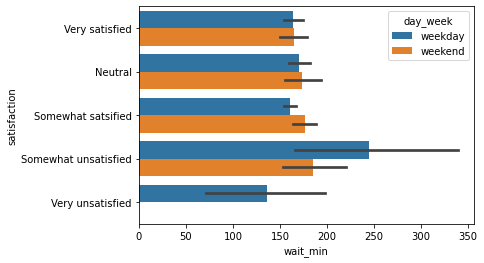

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=airlines, x='wait_min', y='satisfaction', hue='day_week')
plt.show()

---

## Cleaning text data

### What is text data?
Text data is one of the most common types of data types. Examples of it range from names, phone numbers, addresses, emails and more. Common text data problems include handling inconsistencies, making sure text data is of a certain length, typos and others.

Type of data | Example values
:---|:---
Names | `Alex`, `Sara`, ...
Phone numbers | `+96171679912`, ...
Emails | 'emails@email.com', ...
Passwords | ...

**Common text data problems**
1. *Data inconsistency*:
    - `+96171679912` or `0096171679912` or ...?
2. *Fixed length violations*:
    - Passwords needs to be at least * characters
3. *Typos*:
    - `+961.71.679912`
    
### Example

```python
phone = pd.read_csv('phones.csv')
print(phones)
```
We can see that there are phone number values, that begin with 00 or +. We also see that there is one entry where the phone number is 4 digits, which is non-existent. Furthermore, we can see that there are dashes across the phone number column. 

```
              Full name      Phone number
0    Prescott D. Gardin  001-879-232-1231
1          Gil B. Silva  001-346-345-6122
2       Noelani A. Gray  001-702-372-9813
3      Reece M. Andrews   +1-297-994-1283   <-- Inconsistent data format
4        Hayfa E. Keith  001-335-884-1535
5       Benedict Valdez              4153   <-- Length violation
6 ...
..
```
 If we wanted to feed these phone numbers into an automated call system, or create a report discussing the distribution of users by area code, we couldn't really do so without uniform phone numbers.
 
 Ideally, we'd want to the phone number column as such. Where all phone numbers are aligned to begin with 00, where any number below the 10 digit value is replaced with NaN to represent a missing value, and where all dashes have been removed. 

```
              Full name   Phone number
0    Prescott D. Gardin  0018792321231
1          Gil B. Silva  0013463456122
2       Noelani A. Gray  0017023729813
3      Reece M. Andrews  0012979941283 
4        Hayfa E. Keith            NaN
5       Benedict Valdez  0013546154153
6 ...
..
```


### Fixing the phone number column
Let's first begin by replacing the plus sign with 00, to do this, we use the `.str.replace` method which takes in two values, the string being replaced, which is in this case the plus sign and the string to replace it with which is in this case `00`. 

```python
# Replace '+' with '00'
phones['Phone number'] = phones['Phone number'].str.replace('+', '00')
```

We use the same exact technique to remove the dashes, by replacing the dash symbol with an empty string.

```python
# Replace '-' with nothing
phones['Phone number'] = phones['Phone number'].str.replace('-', '')
```

finally we're going to replace all phone numbers below 10 digits to `NaN`. We can do this by chaining the Phone number column with the `.str.len` method, which returns the string length of each row in the column. We can then use the `.loc` method, to index rows where digits is below `10`, and replace the value of Phone number with numpy's `nan` object.

```python
# Replace phone numbers with lower than 10 digits to NaN
digits = phones['Phone number'].str.len()
phones.loc[digits < 10, 'Phone number'] = np.nan
```

We can also write `assert` statements to test whether the phone number column has a specific length,and whether it contains the symbols we removed. 

The first `assert` statement tests that the minimum length of the strings in the phone number column, found through `str.len`, is bigger than or equal to 10.

```python
# Find length of each row in Phone number column
sanity_check = phones['Phone number'].str.len()
```
```python
# Assert minimum phone number length is 10
assert sanity_ckeck.min() >= 10
```

In the second assert statement, we use the `str.contains` method to test whether the phone number column contains a specific pattern. It returns a series of booleans for that are `True` for matches and `False` for non-matches. We set the pattern plus bar pipe minus, the bar pipe here is basically an or statement, so we're trying to find matches for either symbols. We chain it with the any method which returns `True` if any element in the output of our `.str.contains` is `True`, and test whether the it returns `False`.

```python
# Assert all numbers do not have '+' or '-'
assert phones['Phone number'].str.contains('+|-').any() == False
```

### But what about more complicated examples?
But what about more complicated examples? How can we clean a phone number column that looks like this for example? 

```python
phones.head()
```
```
              Full name     Phone number
0    Prescott D. Gardin  +(01879)-321231
1          Gil B. Silva    +0134-6346122
2       Noelani A. Gray       +0017-9813
3      Reece M. Andrews    +01297-941283 
4        Hayfa E. Keith   +(016977)-8423
```

Where phone numbers can contain a range of symbols from plus signs, dashes, parenthesis and maybe more. This is where **regular expressions** come in. 

**Regular expressions** give us the ability to search for any pattern in text data, like only digits for example. They are like control + find in your browser, but way more dynamic and robust.

### Regular expressions in action
Here we are attempting to only extract digits from the phone number column. To do this, we use the `.str.replace` method with the pattern we want to replace with an empty string. Notice the pattern fed into the method. This is essentially us telling pandas to replace anything that is not a digit with nothing. They are immensely useful for difficult string cleaning tasks

```python
# Replace letters with nothing
phones['Phone number'] = phones['Phone number'].str.replace(r'\D+', '')
```

## Removing titles and taking names
While collecting survey respondent metadata in the `airlines` DataFrame, the full name of respondents was saved in the `full_name` column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as `"Dr."`, `"Mr."`, `"Ms."` and `"Miss"`.

Your ultimate objective is to create two new columns named `first_name` and `last_name`, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

- Remove `"Dr."`, `"Mr."`, `"Miss"` and `"Ms."` from `full_name` by replacing them with an empty string `""` in that order.
- Run the `assert` statement using `.str.contains()` that tests whether `full_name` still contains any of the honorifics.

```python
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace('Dr.', '')

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace('Mr.', '')

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace('Miss', '')

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace('Ms.', '')

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False
```

## Keeping it descriptive
To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the `survey_response` column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than ***40*** , and make sure your new DataFrame contains responses with ***40*** characters or more using an `assert` statement.

- Using the `airlines` DataFrame, store the length of each instance in the `survey_response` column in `resp_length` by using `.str.len()`.
- Isolate the rows of `airlines` with `resp_length` higher than `40`.
- Assert that the smallest survey response length in `airlines_survey` is now bigger than `40`.

```python
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])
```

```
output:
    18    The airport personnell forgot to alert us of d...
    19    The food in the airport was really really expe...
    20    One of the other travelers was really loud and...
    21    I don't remember answering the survey with the...
    22    The airport personnel kept ignoring my request...
    23    The chair I sat in was extremely uncomfortable...
    24    I wish you were more like other airports, the ...
    25    I was really unsatisfied with the wait times b...
    27    The flight was okay, but I didn't really like ...
    28    We were really slowed down by security measure...
    29    There was a spill on the aisle next to the bat...
    30    I felt very unsatisfied by how long the flight...
    Name: survey_response, dtype: object
```